<a href="https://colab.research.google.com/github/RamadhikaS/CapstoneUASBengkod/blob/main/BengkodUAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nama : Ramadhika Surya Purmiadanu
#NIM    : A11.2022.14116

In [2]:
import pandas as pd #mengimport panda dengan rujukan pd
import numpy as np #mengimport numpy dengan rujukan np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/ObesityDataSet.csv"
df = pd.read_csv(file_path) #syntax untuk membaca keseluruhan dataset yang dimana akan membaca dataset dari drive

In [4]:
df.head() #saya menampilkan 5 data awal, sekalian memastikan ternyata code nya berjalan dan bisa menampilkan data terlebih dahulu

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.info() #menampilkan informasi struktur dataframe secara lengkap, termasuk missing value dan memori

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [6]:
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [7]:
# Daftar kolom yang seharusnya numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi kolom-kolom tersebut ke numerik
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek kembali apakah muncul missing value setelah konversi
print(df[numeric_cols].isnull().sum())

# Jika ada yang NaN, kamu bisa drop
df.dropna(subset=numeric_cols, inplace=True)

Age       22
Height    22
Weight    19
FCVC      18
NCP       22
CH2O      15
FAF       19
TUE       15
dtype: int64


In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000
mean,24.724016,1.707991,88.765772,2.444080,2.730535,2.038373,1.080414,0.685065
std,8.504616,0.118861,36.737095,0.647913,0.992673,0.745814,1.167219,0.726979
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.975735,1.630000,66.000000,2.000000,2.661818,1.590922,0.128856,0.000000
50%,22.766227,1.703202,83.014033,2.392665,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.770202,108.015907,3.000000,3.000000,2.498811,1.687877,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [9]:
#saya mengecek apakah ada data yang duplikat yang harus dibersihkan
print("Jumlah duplikat sebelum dibersihkan:", df.duplicated().sum())

# Menghapus duplikat jika ada
df = df.drop_duplicates()

print("Jumlah duplikat setelah dibersihkan:", df.duplicated().sum())

Jumlah duplikat sebelum dibersihkan: 18
Jumlah duplikat setelah dibersihkan: 0


In [10]:
# Mengecek unique value dari setiap kolom
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("")

Unique values in 'Age':
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

Unique values in 'Gender':
['Female' 'Male' '?' nan]

Unique values in 'Height':
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Unique values in 'Weight':
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

Unique values in 'CALC':
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Unique values in 'FAVC':
['no' 'yes' '?' nan]

Unique values in 'FCVC':
[2.         3.         1.         8.14899274 8.42397393 2.450218
 2.880161   2.00876    2.596579   2.591439   2.392665   1.123939
 2.027574   2.658112   2.88626    2.714447   2.750715   1.4925
 2.059138   2.596364   2.767731   2.815157   2.737762   2.524428
 2.971574   1.0816     1.270448   2.959658   2.725282   2.44004
 2.432302   2.592247   2.449267   2.929889   2.015258   1.031149
 1.592183   1.21498    1.522001   2.703436   2.362918   2.14084
 2.336044   1.813234   2.724285   2.71897    1.133844   1.757466
 2.9

In [11]:
# Mengganti "?" dengan NaN
df.replace("?", np.nan, inplace=True)

In [12]:
print("\nJumlah missing value setelah replace '?':")
print(df.isnull().sum())


Jumlah missing value setelah replace '?':
Age                                0
Gender                            22
Height                             0
Weight                             0
CALC                              20
FAVC                              22
FCVC                               0
NCP                                0
SCC                               18
SMOKE                             13
CH2O                               0
family_history_with_overweight    23
FAF                                0
TUE                                0
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [13]:
# Menghapus baris yang memiliki missing value
df.dropna(inplace=True)

In [14]:
print("\nJumlah missing value setelah dropna:")
print(df.isnull().sum())


Jumlah missing value setelah dropna:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [15]:
print(df.dtypes)

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


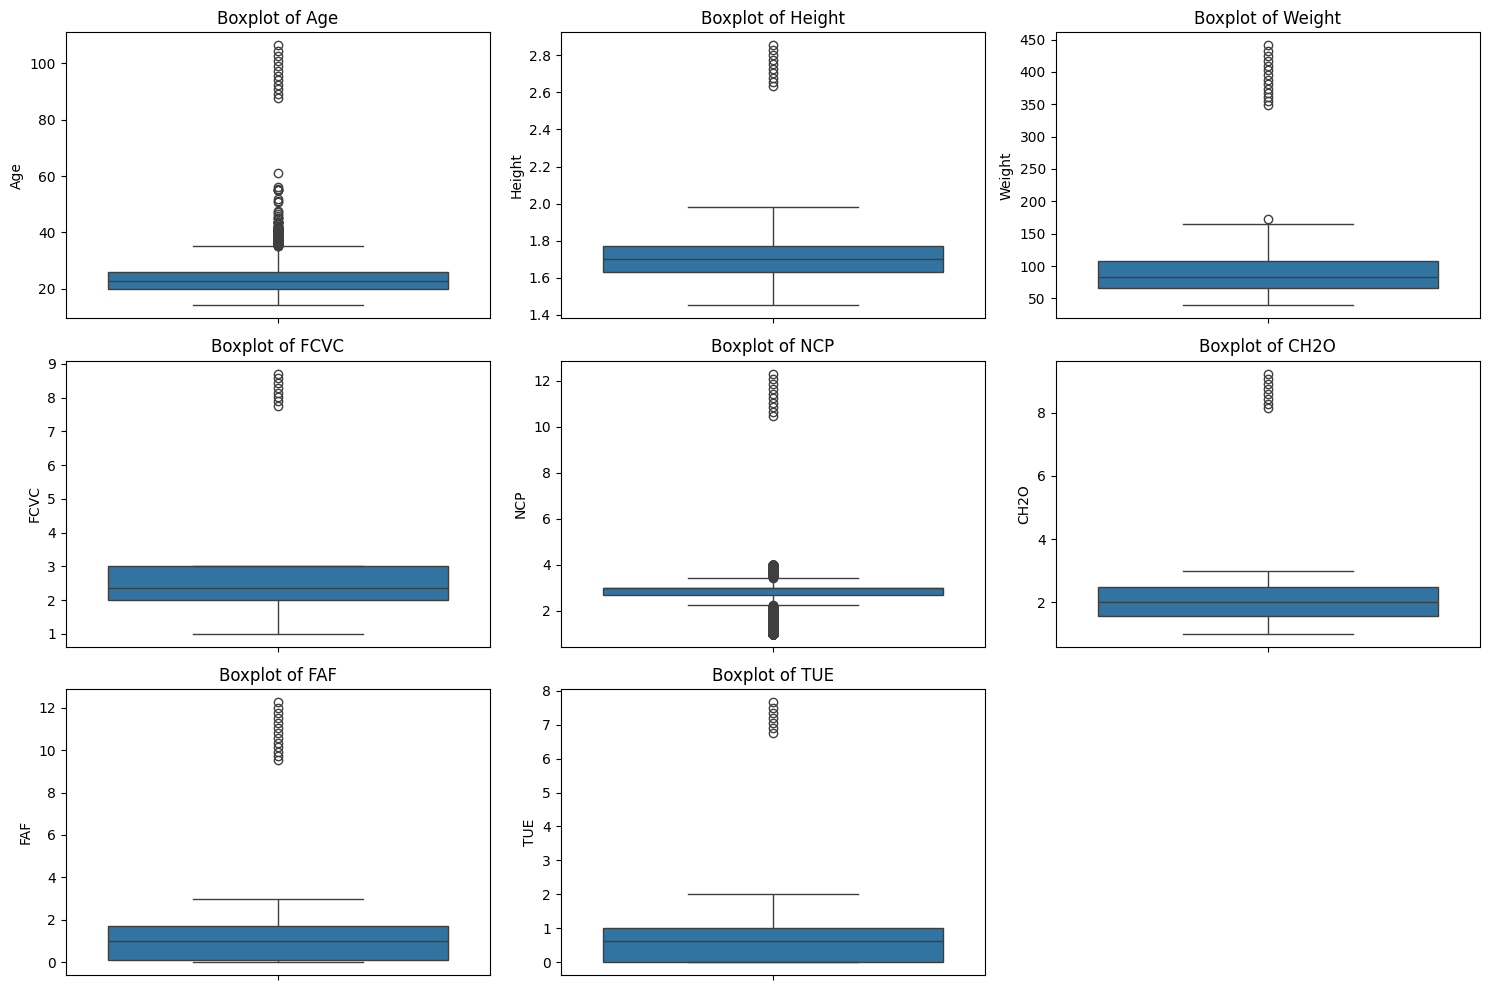

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Atur ukuran plot
plt.figure(figsize=(15, 10))

# Buat boxplot untuk setiap fitur numerik
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [23]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df, numeric_cols)

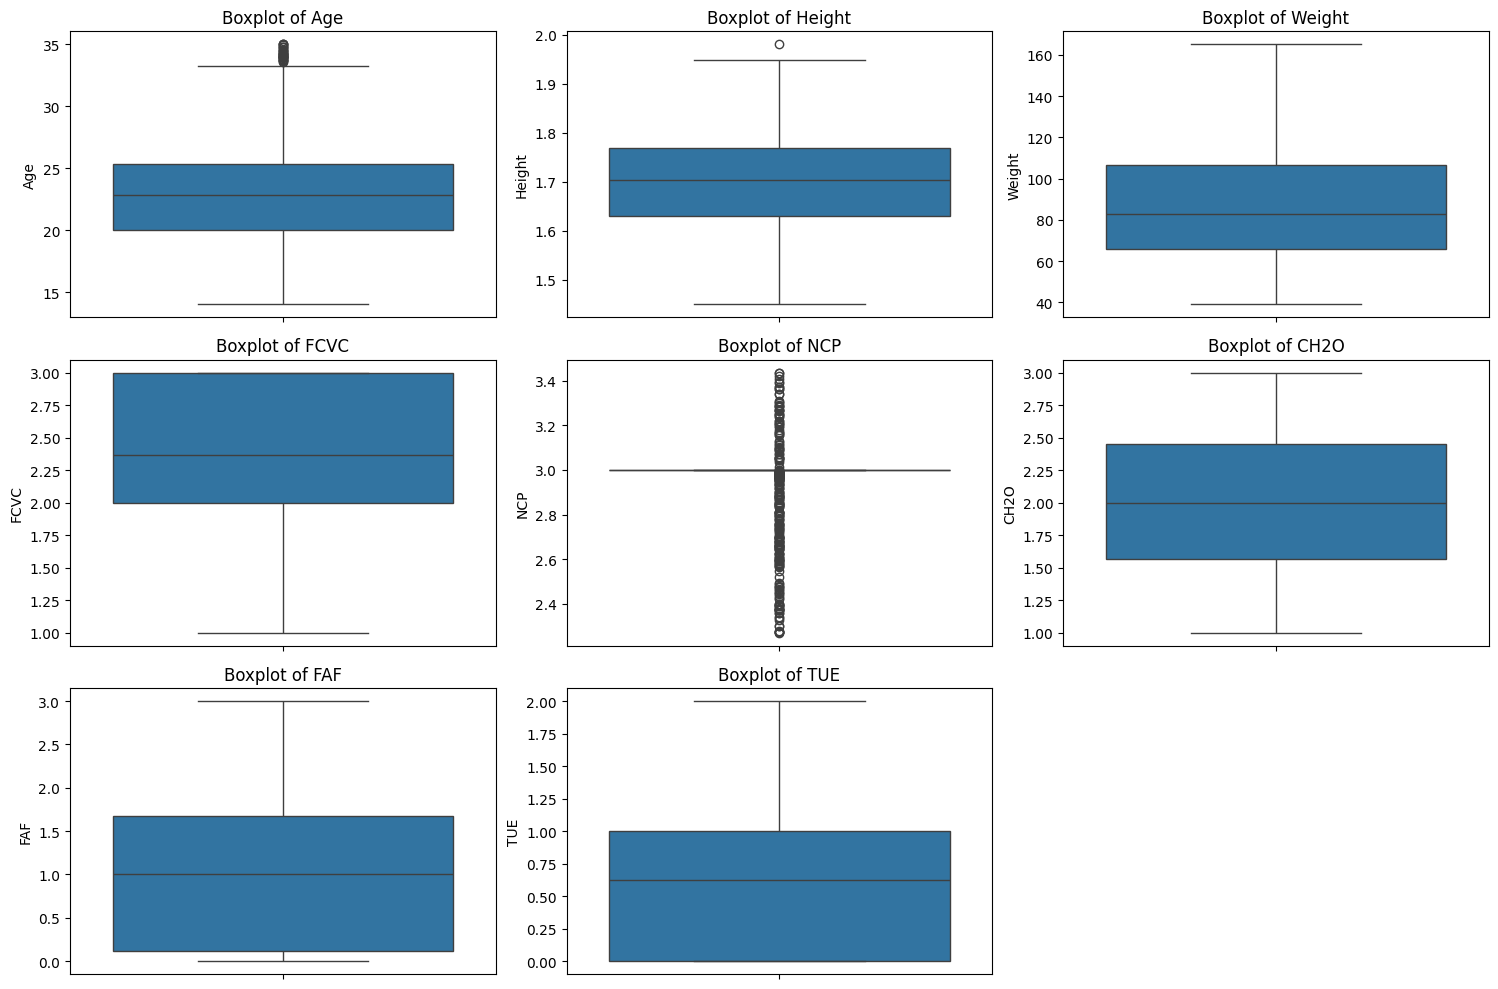

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi ulang setelah handling outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [25]:
def count_outliers(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
    return outlier_summary

outliers_remaining = count_outliers(df, numeric_cols)
print(outliers_remaining)

{'Age': 33, 'Height': 1, 'Weight': 0, 'FCVC': 0, 'NCP': 260, 'CH2O': 0, 'FAF': 0, 'TUE': 0}
